In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import re
import scanpy as sc
from scipy.sparse import csr_matrix
import scvi
import torch
import seaborn as sns

In [4]:
filename = '../data_out/matrix_filtered_stim_after_filtering.h5ad'
adata_stim = sc.read(filename)

In [5]:
filename = '../data_out/matrix_filtered_nostim_after_filtering.h5ad'
adata_nostim = sc.read(filename)

In [7]:
adata = sc.concat([adata_stim, adata_nostim])

# Normalization

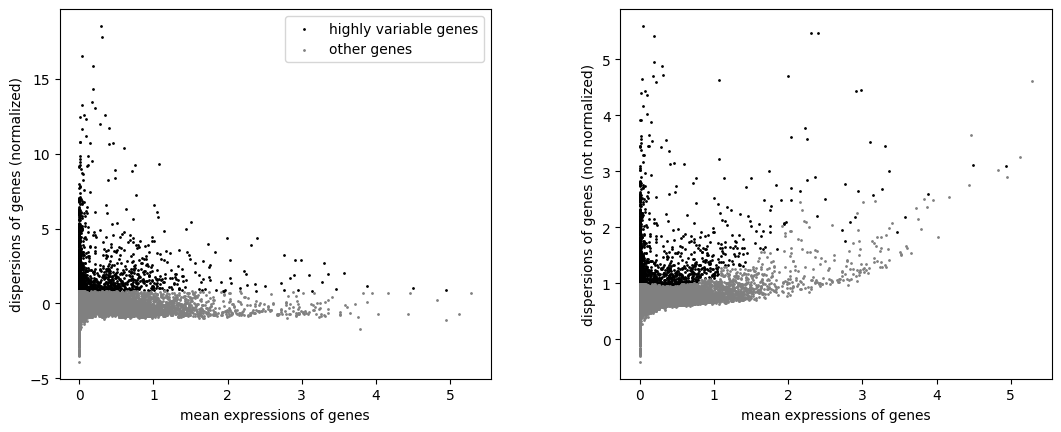

/home/julian/miniconda3/envs/cellrep/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:668: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


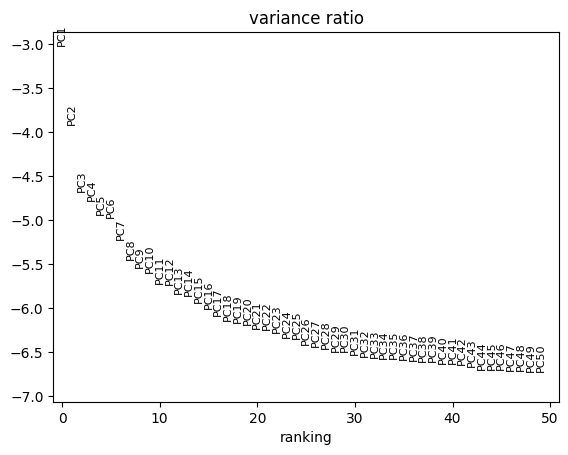

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 835008 stored elements and shape (52188, 52188)>

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1171344 stored elements and shape (52188, 52188)>

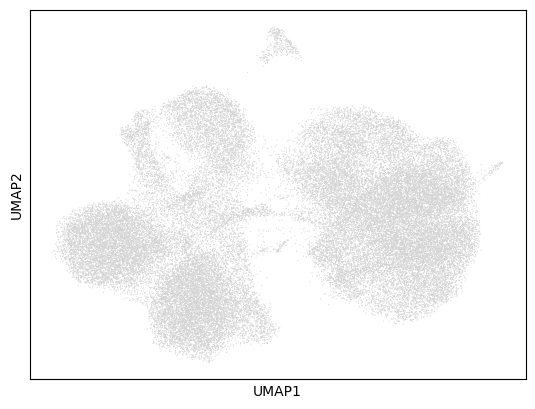

/tmp/ipykernel_1817260/325681201.py:30: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


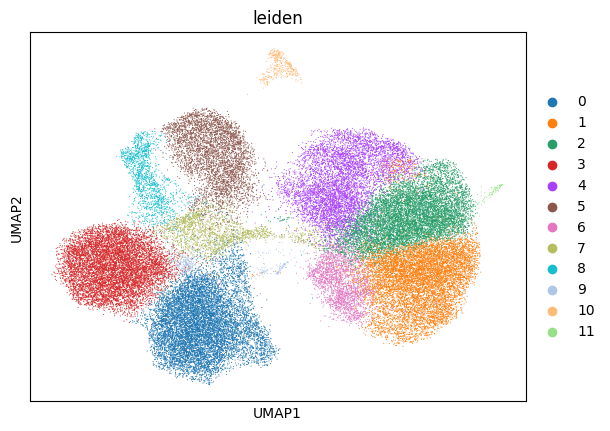

In [8]:
# Normalization
adata.X.sum(axis = 1).max(), adata.X.sum(axis = 1).mean(), adata.X.sum(axis = 1).std(), adata.X.sum(axis = 1).min()
sc.pp.normalize_total(adata, target_sum=1e4)
adata.X.sum(axis = 1)
sc.pp.log1p(adata) #change to log counts
adata.X.sum(axis = 1)
adata.raw = adata
adata.X
adata
# Clustering
# Esto no corta sino que agrega un flag
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
adata.var
adata
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
adata
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.regress_out.html
# Linear Regression
# Creo que tiene que ver con 'pct_counts_mt', 'pct_counts_ribo' que se pueden usar como referencia
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)
sc.pp.neighbors(adata, n_pcs = 30)
display(adata.obsp['distances'])
display(adata.obsp['connectivities'])
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
adata.obs
sc.pl.umap(adata, color=['leiden'])

In [10]:
adata.obs

,condition,crispr,guide_id,gene,well,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,leiden
AAACCCAAGGGCGAAG-5,Stim,perturbed,CEACAM1-1,CEACAM1,5,False,1506,3263.0,723.0,22.157522,361.0,11.063438,1506,1
AAACCCACACAAATAG-5,Stim,perturbed,DEF6-1,DEF6,5,False,2980,6823.0,807.0,11.827641,743.0,10.889638,2980,2
AAACCCAGTAAGACCG-5,Stim,perturbed,LCP2-2,LCP2,5,False,2611,7027.0,373.0,5.308097,1097.0,15.611214,2611,2
AAACCCAGTCGTCGGT-5,Stim,perturbed,DEF6-1,DEF6,5,False,3025,6902.0,1003.0,14.532020,648.0,9.388583,3025,1
AAACCCAGTGTTGACT-5,Stim,perturbed,FOXD2-2,FOXD2,5,False,3613,10561.0,2070.0,19.600416,1024.0,9.696052,3613,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGCTTTCCC-4,Nostim,perturbed,CBY1-2,CBY1,4,False,830,1381.0,198.0,14.337437,137.0,9.920347,830,0
TTTGTTGAGTGGATAT-4,Nostim,perturbed,WT1-1,WT1,4,False,2782,7064.0,530.0,7.502831,716.0,10.135900,2782,5
TTTGTTGCAAGACCGA-4,Nostim,perturbed,TNFRSF1A-2,TNFRSF1A,4,False,3649,10544.0,925.0,8.772762,771.0,7.312215,3649,5
TTTGTTGGTTGTGGAG-4,Nostim,perturbed,EMP3-2,EMP3,4,False,1734,3778.0,332.0,8.787719,702.0,18.581259,1734,0


condition
Stim      8693
Nostim      29
Name: count, dtype: int64

In [19]:
for l in adata.obs['leiden'].unique():
    display(adata.obs[adata.obs['leiden'] == l].value_counts('condition').reset_index())


,condition,count
0,Stim,8693
1,Nostim,29


,condition,count
0,Stim,8355
1,Nostim,99


,condition,count
0,Stim,2308
1,Nostim,7


,condition,count
0,Stim,6144
1,Nostim,56


,condition,count
0,Nostim,203
1,Stim,171


,condition,count
0,Nostim,8055
1,Stim,50


,condition,count
0,Nostim,1683
1,Stim,239


,condition,count
0,Stim,69
1,Nostim,16


,condition,count
0,Nostim,346
1,Stim,84


,condition,count
0,Nostim,1521
1,Stim,20


,condition,count
0,Nostim,4028
1,Stim,26


,condition,count
0,Nostim,9894
1,Stim,92
